<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Coursera_week_1_Freezing_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
                    layers.Dense(4 , input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                                 bias_initializer='ones'),
                    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
                    layers.Dense(4, activation='softmax')

])

In [119]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 2)                 10        
                                                                 
 dense_44 (Dense)            (None, 4)                 12        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [120]:
def get_weights(model):
  return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
   return [e.bias.numpy() for e in model.layers]
   
def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
    delta_1 = W1_layers[n] - W0_layers[n]
    print('Layer'+'str(n)+:bias variation:', np.linalg.norm(b1_layers[n]-b0_layers[n]))
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(delta_1)
    plt.title('Layer'+str(n))
    plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation')  


In [121]:
W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [122]:
X_train = np.random.random((100, 4))
y_train = X_train

X_test = np.random.random((20,4))
y_test = X_test

In [123]:
model.compile(optimizer = 'adam',
              loss='mse',
              metrics=['acc'])

model.fit(X_train, y_train, epochs=50, verbose=False)

In [124]:
W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layerstr(n)+:bias variation: 0.23956418
Layerstr(n)+:bias variation: 0.2061119
Layerstr(n)+:bias variation: 0.3088672


Text(0.5, 0.98, 'Weight matrices variation')

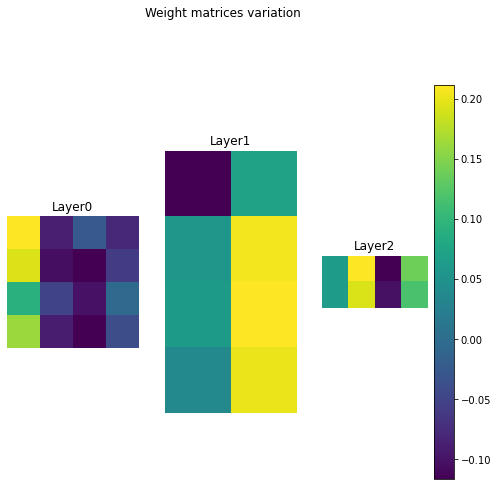

In [125]:
plt.figure(figsize=(8,8))
for n in range(3):
  delta_1 = W1_layers[n] - W0_layers[n]
  print('Layer'+'str(n)+:bias variation:', np.linalg.norm(b1_layers[n]-b0_layers[n]))
  ax = plt.subplot(1, 3, n+1)
  plt.imshow(delta_1)
  plt.title('Layer'+str(n))
  plt.axis('off')

plt.colorbar()
plt.suptitle('Weight matrices variation')  

In [126]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [127]:
model = Sequential([
                    layers.Dense(4 , input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                                 bias_initializer='ones', trainable=False),
                    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
                    layers.Dense(4, activation='softmax')

])

In [128]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

print(n_trainable_variables, n_non_trainable_variables)

4 2


In [129]:
W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [130]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(X_train, y_train, epochs=50, verbose=False);

In [131]:
W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layerstr(n)+:bias variation: 0.0
Layerstr(n)+:bias variation: 0.21325046
Layerstr(n)+:bias variation: 0.36573035


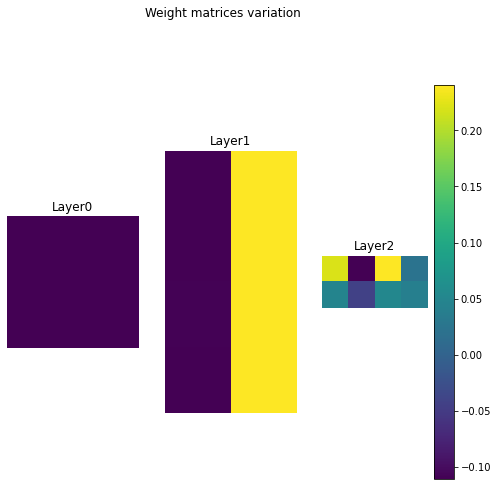

In [132]:
plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

In [133]:
model.layers[1].trainable = False
print('\n After freezing:\n\t Number of trainable variables:', len(model.trainable_variables),
      '\n\t Number of non trainable variables:', len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables: 2 
	 Number of non trainable variables: 4


In [134]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(X_train, y_train, epochs=50, verbose=False)

In [141]:
W2_layers = get_weights(model)
b2_layers = get_biases(model)

Layerstr(n)+:bias variation: 0.0
Layerstr(n)+:bias variation: 0.0
Layerstr(n)+:bias variation: 0.3181749


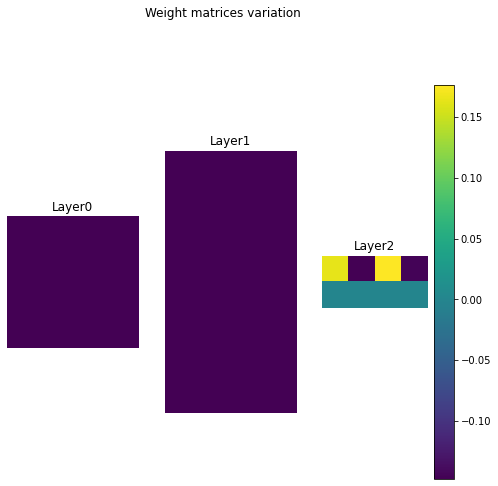

In [142]:
plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)